In [1]:
from sklearn.datasets import make_gaussian_quantiles #Generate isotropic Gaussian and label samples by quantile
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# Gaussian Data
samples = 2
def load_extra_datasets(N):
    gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.7,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
    return gaussian_quantiles

gaussian_quantiles = load_extra_datasets(samples)

X, Y = gaussian_quantiles

X, Y = X.T, Y.reshape(1, Y.shape[0])

print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("X:\n", X)
print("Y:\n", Y)

X shape: (2, 2)
Y shape: (1, 2)
X:
 [[-0.60934622 -0.12807523]
 [-0.81763885  0.79855457]]
Y:
 [[1 0]]


[[1 0]]


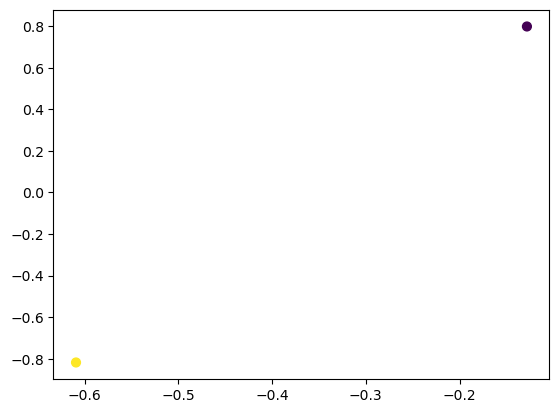

In [4]:
print(Y)

plt.scatter(X[0, :], X[1, :], c=Y, s=40)
plt.show()

In [5]:
X

array([[-0.60934622, -0.12807523],
       [-0.81763885,  0.79855457]])

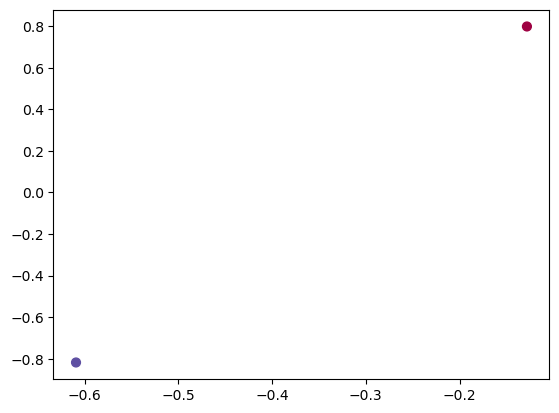

In [6]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

### Logistic Regression

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


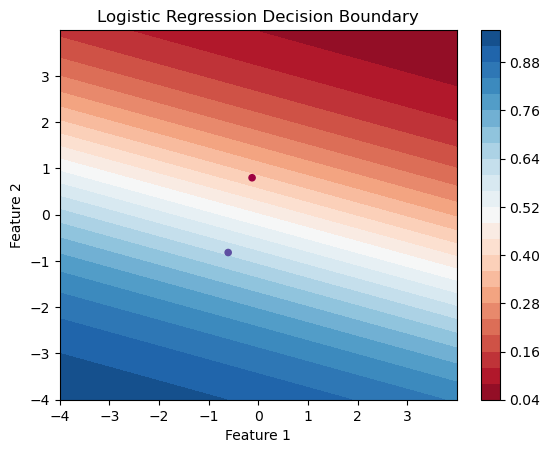

Accuracy of logistic regression: 100 % (percentage of correctly labelled datapoints)


/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_31278/3588379325.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1-LR_predictions))/float(Y.size)*100)


In [8]:
import numpy as np

xx, yy = np.mgrid[-4:4:.01, -4:4:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

# Logistic model
clf = LogisticRegression()
clf.fit(X.T, Y.T)

# Probabilities for each point in the grid
probs = clf.predict_proba(grid)[:, 1]
probs = probs.reshape(xx.shape)

plt.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
plt.colorbar()
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Model's accuracy
LR_predictions = clf.predict(X.T)
accuracy = float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1-LR_predictions))/float(Y.size)*100)
print("Accuracy of logistic regression: %d %%" % accuracy, "(percentage of correctly labelled datapoints)")

In [9]:
# Neural Network with different learning rates

# Learning rates to test and 10 iterations
learning_rates = [0.0001, 0.01, 1.0]
iterations = 10
results = {}

# Original sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Network for each learning rate
for lr in learning_rates:
    print(f"\n--- Learning Rate: {lr} ---")
    results[lr] = []
    
    gaussian_quantiles = load_extra_datasets(samples)
    X, Y = gaussian_quantiles
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    
    # Neural network architecture
    n_x = X.shape[0]  # size of input layer
    n_h = 4
    n_y = Y.shape[0]  # size of output layer
    
    print(n_x, n_y)  # Should output: 2 1
    
    # Parameters
    np.random.seed(42)  # For reproducibility
    W1 = np.random.randn(n_h, n_x) * 0.01  # 4x2
    b1 = np.zeros(shape=(n_h, 1))  # 4x1
    W2 = np.random.randn(n_y, n_h) * 0.01  # 1x4
    b2 = np.zeros(shape=(n_y, 1))  # 1x1
    
    print("W1\n", W1)
    print("b1\n", b1)
    print("W2\n", W2)
    print("b2\n", b2)
    
    # Total cost
    total_cost = -9999
    
    # Initial b2 for the first comparison
    b2_old = b2.copy()
    print("b2 before=", b2_old)
    
    # Running for the 10 iterations
    for i in range(iterations):
        # Forward Propagation
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)  # Final output prediction
        
        if i == 0:
            print("Z1.shape", Z1.shape)
            print("A1.shape", A1.shape)
            print("Z2.shape", Z2.shape)
            print("A2.shape", A2.shape)
        
        # Cross-entropy cost
        old_total_cost = total_cost
        cost_function = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
        total_cost = -np.sum(cost_function) / samples
        
        if i == 0:
            print("cost_function.shape", cost_function.shape)
        
        # Backpropagation
        dZ2 = A2 - Y
        dW2 = (1 / samples) * np.dot(dZ2, A1.T)
        db2 = (1 / samples) * np.sum(dZ2, axis=1, keepdims=True)
        
        # first derivative of d/dz tanh(z) = 1 - tanh(z)^2 = 1 - A1^2
        dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
        dW1 = (1 / samples) * np.dot(dZ1, X.T)
        db1 = (1 / samples) * np.sum(dZ1, axis=1, keepdims=True)
        
        # Updating the parameters using gradient descent
        W1 = W1 - lr * dW1
        b1 = b1 - lr * db1
        W2 = W2 - lr * dW2
        b2 = b2 - lr * db2
        
        # Delta change
        delta_change = b2 - b2_old
        results[lr].append(delta_change.copy())
        
        # Updating b2
        b2_old = b2.copy()
        
        # Results
        print(f"Iteration {i+1}, cost={total_cost}, cost delta={np.subtract(total_cost, old_total_cost)}")
        print(f"b2 after= {b2}")
        print(f"delta change= {delta_change}")
    
    print(f"Final b2 value: {b2}")
    print(f"Total delta change over {iterations} iterations: {sum([delta[0][0] for delta in results[lr]])}")



--- Learning Rate: 0.0001 ---
2 1
W1
 [[ 0.00496714 -0.00138264]
 [ 0.00647689  0.0152303 ]
 [-0.00234153 -0.00234137]
 [ 0.01579213  0.00767435]]
b1
 [[0.]
 [0.]
 [0.]
 [0.]]
W2
 [[-0.00469474  0.0054256  -0.00463418 -0.0046573 ]]
b2
 [[0.]]
b2 before= [[0.]]
Z1.shape (4, 2)
A1.shape (4, 2)
Z2.shape (1, 2)
A2.shape (1, 2)
cost_function.shape (1, 2)
Iteration 1, cost=0.6931319052270508, cost delta=9999.693131905227
b2 after= [[-2.0729034e-09]]
delta change= [[-2.0729034e-09]]
Iteration 2, cost=0.6931319045776462, cost delta=-6.494046411731347e-10
b2 after= [[-4.14584136e-09]]
delta change= [[-2.07293796e-09]]
Iteration 3, cost=0.6931319039282202, cost delta=-6.494259574552075e-10
b2 after= [[-6.21881388e-09]]
delta change= [[-2.07297252e-09]]
Iteration 4, cost=0.693131903278773, cost delta=-6.494471627149778e-10
b2 after= [[-8.29182097e-09]]
delta change= [[-2.07300709e-09]]
Iteration 5, cost=0.6931319026293044, cost delta=-6.494687010416555e-10
b2 after= [[-1.03648626e-08]]
delta cha

In [10]:
print("\nSummary Results")
print(f"{'Iteration':<10} {'LR=0.0001':<15} {'LR=0.01':<15} {'LR=1.0':<15}")
print("-" * 55)

for i in range(iterations):
    print(f"{i+1:<10} {results[0.0001][i][0][0]:<15.10f} {results[0.01][i][0][0]:<15.10f} {results[1.0][i][0][0]:<15.10f}")

print("-" * 55)
total_0001 = sum([delta[0][0] for delta in results[0.0001]])
total_001 = sum([delta[0][0] for delta in results[0.01]])
total_1 = sum([delta[0][0] for delta in results[1.0]])
print(f"{'Total':<10} {total_0001:<15.10f} {total_001:<15.10f} {total_1:<15.10f}")



Summary Results
Iteration  LR=0.0001       LR=0.01         LR=1.0         
-------------------------------------------------------
1          -0.0000000021   0.0000000874    0.0000087396   
2          -0.0000000021   0.0000000883    0.0000184156   
3          -0.0000000021   0.0000000893    0.0000280801   
4          -0.0000000021   0.0000000902    0.0000399206   
5          -0.0000000021   0.0000000911    0.0000560088   
6          -0.0000000021   0.0000000921    0.0000780625   
7          -0.0000000021   0.0000000930    0.0001068006   
8          -0.0000000021   0.0000000939    0.0001398722   
9          -0.0000000021   0.0000000949    0.0001665040   
10         -0.0000000021   0.0000000958    0.0001552304   
-------------------------------------------------------
Total      -0.0000000207   0.0000009160    0.0007976343   


1. Small learning rate (0.0001):
 - Produces very small weight updates.
 - Requires many iterations to converge.
 - Training progress is slow but stable.

2. Medium learning rate (0.01):
 - Provides balanced weight updates.
 - Makes meaningful progress toward convergence.
 - Good trade-off between speed and stability.

3. Large learning rate (1.0):
 - Causes large weight updates.
 - May lead to unstable learning or oscillations.
.- Can overshoot optimal values and potentially diverge.